## Chapter 5

# 5.3)

dividing a random set of observations to K different groups, another approach is dividing them into relatively equal parts.
we treat the first set as a validation, and we fit what remains into k-1 folds. we then calculate the mean square error, this is repeated k times and in every round we use a different group for validation.

# b)

K-fold approach is more efficient than the validation set approach when data size is small however k fold is slower which poses an issue when data is large

k-fold is smaller than LOOCV in terms of variance.

# 5.8)

In [3]:
#A)
set.seed(1)
x <- rnorm(100)
y <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)

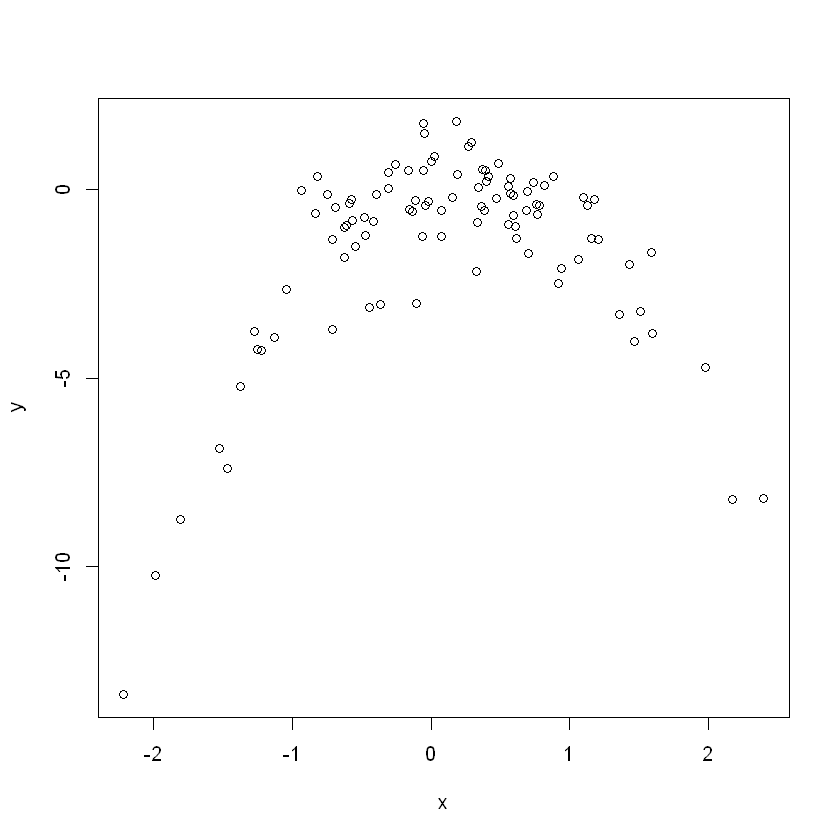

In [4]:
#B)
plot(x, y)

In [10]:
# C)
library(boot)
set.seed(1)
Data <- data.frame(x, y)

# reference https://stat.ethz.ch/R-manual/R-patched/library/stats/html/glm.html

x1 <- glm(y ~ x)
cv.glm(Data, x1)$delta[1]

x2 <- glm(y ~ poly(x, 2))
cv.glm(Data, x2)$delta[1]

x3 <- glm(y ~ poly(x, 3))
cv.glm(Data, x3)$delta[1]

x4 <- glm(y ~ poly(x, 4))
cv.glm(Data, x4)$delta[1]

[1] 6.923056

[1] 1.128194

[1] 1.084727

[1] 1.097829

In [12]:
#D)
library(boot)
set.seed(20)
Data <- data.frame(x, y)

# reference https://stat.ethz.ch/R-manual/R-patched/library/stats/html/glm.html

x1 <- glm(y ~ x)
cv.glm(Data, x1)$delta[1]

x2 <- glm(y ~ poly(x, 2))
cv.glm(Data, x2)$delta[1]

x3 <- glm(y ~ poly(x, 3))
cv.glm(Data, x3)$delta[1]

x4 <- glm(y ~ poly(x, 4))
cv.glm(Data, x4)$delta[1]

[1] 6.923056

[1] 1.128194

[1] 1.084727

[1] 1.097829

# Same results

In [13]:
#f)

summary(x4)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9153  -0.5277   0.1137   0.6562   2.3045  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4825     0.1023 -14.489  < 2e-16 ***
poly(x, 4)1   6.3875     1.0232   6.242  1.2e-08 ***
poly(x, 4)2 -22.8002     1.0232 -22.282  < 2e-16 ***
poly(x, 4)3   2.1839     1.0232   2.134   0.0354 *  
poly(x, 4)4  -1.2613     1.0232  -1.233   0.2207    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.047015)

    Null deviance: 666.475  on 99  degrees of freedom
Residual deviance:  99.466  on 95  degrees of freedom
AIC: 295.25

Number of Fisher Scoring iterations: 2


In [15]:
# p-values indicate that 1st and 2nd degree are statistically significant third and fourth degree are not

# chapter 6

# 6.1: 

A: if k = p then the RSS is smallest

B: to asses the results from running the model are needed

# 6.9

In [37]:
library(ISLR)
str(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [68]:
train = sample(1:dim(College)[1], dim(College)[1] / 2)
test <- -train
CollegeTrain <- College[train, ]
CollegeTest <- College[test, ]

In [39]:
#b)

fit <- lm(Apps ~ ., data = CollegeTrain)
pred  <- predict(fit.lm, CollegeTest)
mean((pred.lm - College.test$Apps)^2)

[1] 1717610

In [47]:
library(glmnet)

In [52]:
trainMatr <- model.matrix(Apps ~ ., data = College.train)
testMatr <- model.matrix(Apps ~ ., data = College.test)

In [55]:
grid <- 10 ^ seq(4, -2, length = 100)

In [57]:
fit <- glmnet(train.mat, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
CV <- cv.glmnet(train.mat, College.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
lambda_best <- cv.ridge$lambda.min
lambda_best

[1] 28.48036

In [59]:
predict(fit, s = lambda_best, newx = test.mat)
mean((pred.ridge - College.test$Apps)^2)

,s1
Agnes Scott College,1869.67515
Albertson College,779.20842
Albion College,2376.86371
Albright College,1293.64396
Alfred University,1982.47405
Allegheny College,2654.21049
Alverno College,446.67011
Amherst College,3414.94098
Anderson University,1154.51819
Andrews University,778.58199


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'mean': object 'pred.ridge' not found


In [63]:
#d)

lasso <- glmnet(train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
cv_lasso <- cv.glmnet(train.mat, College.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
lambda_best_lasso <- cv.lasso$lambda.min
lambda_best_lasso

[1] 4.641589

In [71]:
pred <- predict(lasso, s = lambda_best_lasso, newx = testMatr)

In [75]:
mean((pred - CollegeTest$Apps)^2)

[1] 26052911

In [77]:
predict(fit, s = lambda_best_lasso, type = "coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -380.70814377
(Intercept)    .         
PrivateYes  -611.07246526
Accept         1.15156912
Enroll         0.12455233
Top10perc     33.41404955
Top25perc     -8.69961202
F.Undergrad    0.04273565
P.Undergrad    0.03172053
Outstate      -0.06100715
Room.Board     0.10328059
Books         -0.02786438
Personal      -0.09615777
PhD           -7.98211239
Terminal      -0.68742662
S.F.Ratio     12.35372246
perc.alumni   -5.11658651
Expend         0.09385890
Grad.Rate     10.80708469

In [80]:
install.packages("pls")
library(pls)

package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anakib\AppData\Local\Temp\RtmpiGDvEz\downloaded_packages



Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings




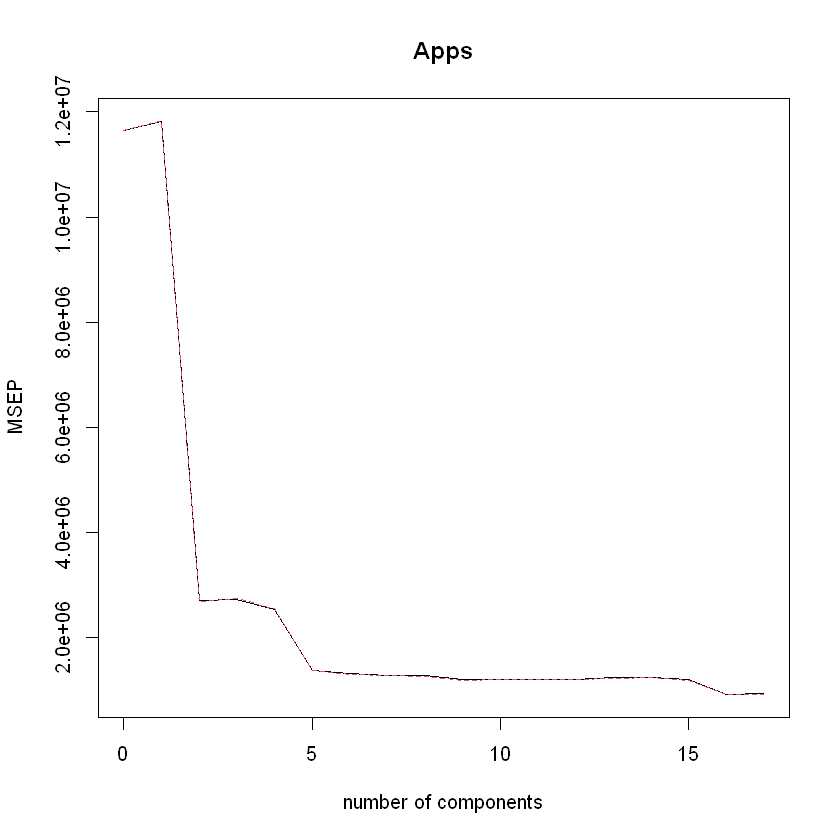

In [82]:
fit.pcr <- pcr(Apps ~ ., data = College.train, scale = TRUE, validation = "CV")
validationplot(fit.pcr, val.type = "MSEP")

# chapter 7 question 9 

In [84]:
library(MASS)
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...



Call:
lm(formula = nox ~ poly(dis, d = 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, d = 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, d = 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, d = 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


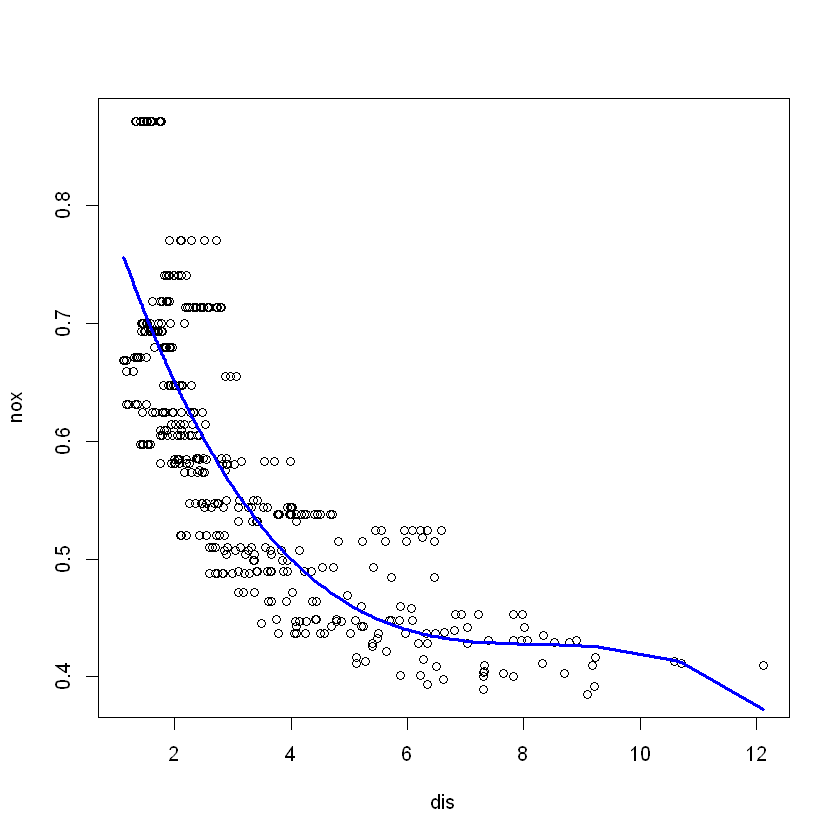

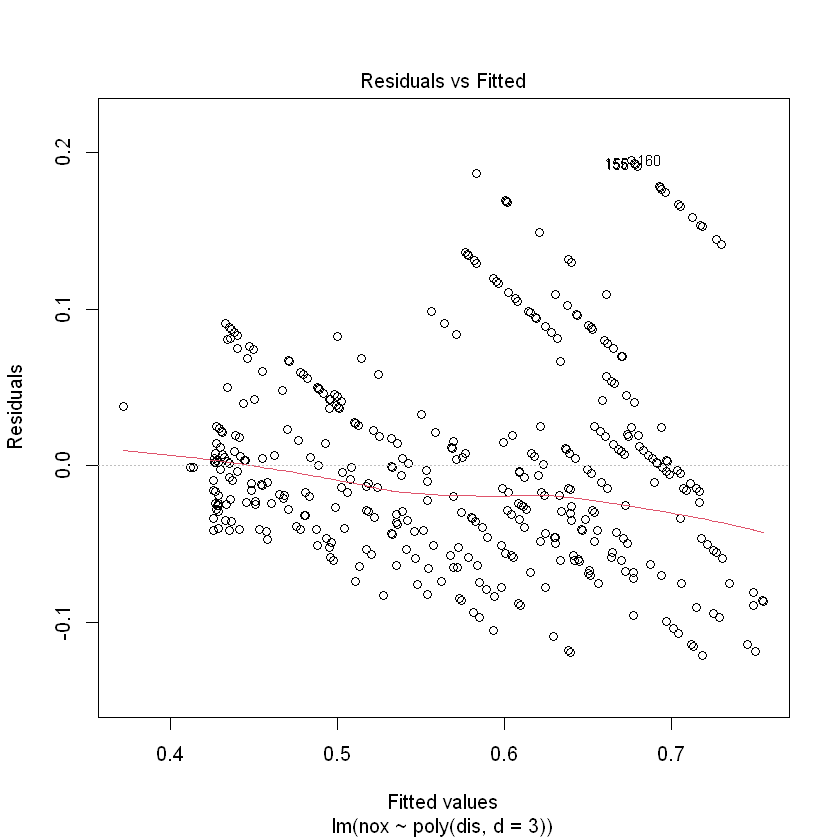

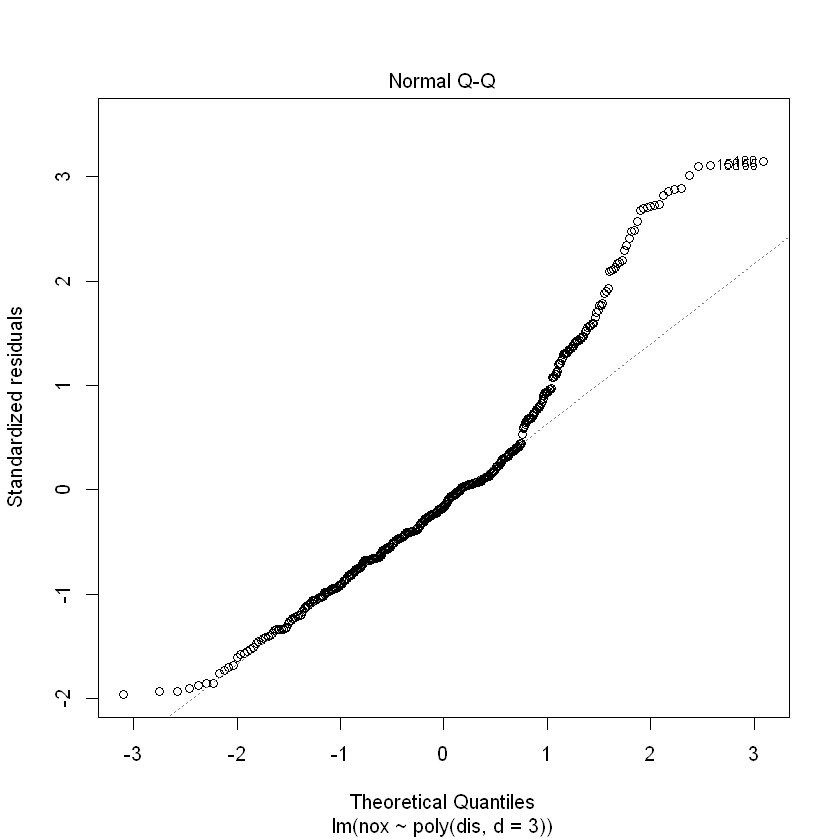

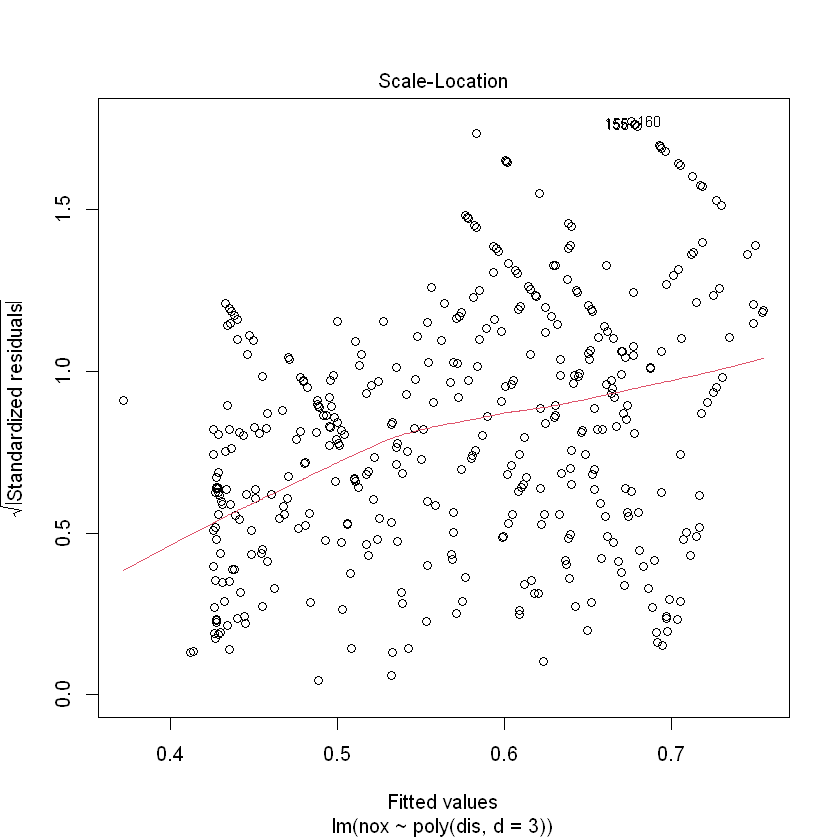

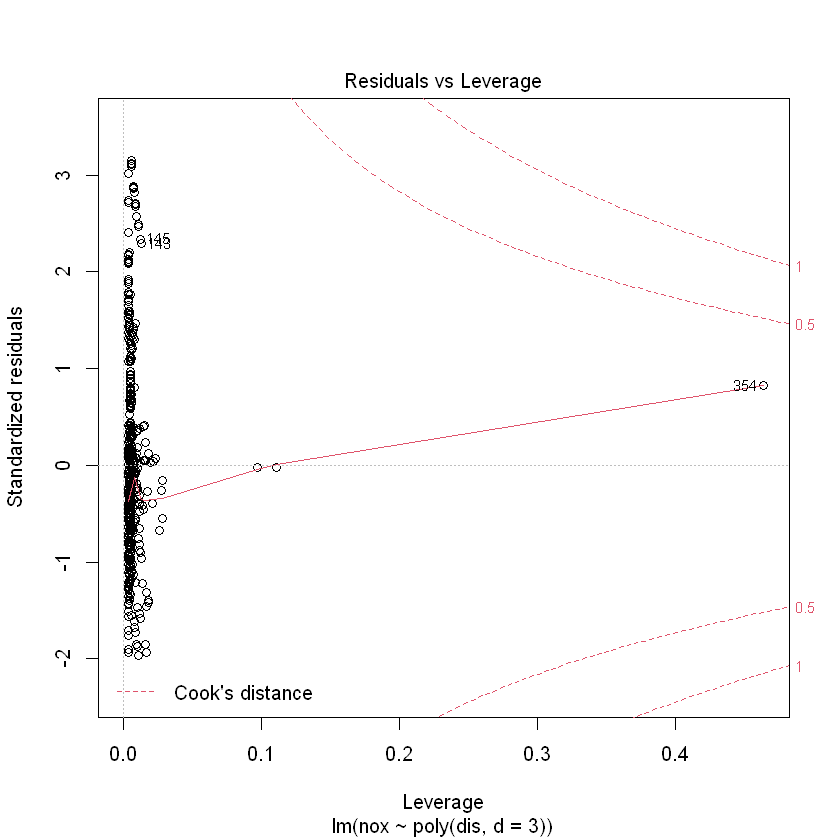

In [88]:
#part a
lr.model <- lm(nox ~ poly(dis, d=3), data=Boston)
summary(lr.model)
plot(Boston$nox ~ Boston$dis, xlab='dis', ylab='nox')
lines(sort(Boston$dis), fitted(lr.model)[order(Boston$dis)], col='blue', type='l',lw=3)
plot(lr.model)